In [5]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan



In [17]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


In [18]:
# on normalise la variable Numrooms 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_preprocess = scaler.fit_transform(total_dataset_clean['Numrooms'].array.reshape(-1, 1)) 
data_preprocess = pd.DataFrame(data_preprocess, columns=['Numrooms'])

In [19]:
total_dataset_clean = total_dataset_clean.drop(['Numrooms'], axis=1)

In [46]:
X = pd.concat([total_dataset_clean, data_preprocess], axis=1)
tokeep = ['log_imputed_rent_uc','Numrooms',
 'Garbcollectfreq',
 'Kitchen',
 'tvservice',
 'Computer',
 'Refrigerator',
 'Stereo',
 'Utilrank',
 'Sewage_system',
 'Washing',
 'Blender',
 'Internet_service',
 'Frequencewat', 'log_imputed_rent','territory', 'own_status', 'gender','marital_status','age','level_educ']

In [47]:
datareg = X[tokeep].dropna()

In [43]:
datareg

,log_imputed_rent_uc,Numrooms,territory,Garbcollectfreq,Kitchen,tvservice,Computer,Refrigerator,Stereo,Utilrank,...,Blender,Internet_service,Frequencewat,log_imputed_rent,territory,own_status,gender,marital_status,age,level_educ
0,13.245793,0.272727,2,3.0,1.0,1.0,2.0,1.0,2.0,3.0,...,1.0,1.0,2.0,13.592367,2,0,1.0,3.0,58.0,5.0
1,12.554873,0.454545,2,3.0,1.0,1.0,2.0,1.0,1.0,3.0,...,1.0,1.0,2.0,13.527828,2,0,1.0,2.0,42.0,5.0
2,13.112262,0.272727,2,3.0,1.0,1.0,1.0,1.0,2.0,3.0,...,1.0,1.0,2.0,13.458836,2,0,2.0,1.0,44.0,5.0
3,12.978522,0.272727,2,2.0,1.0,1.0,1.0,1.0,2.0,3.0,...,1.0,1.0,2.0,13.527828,2,0,1.0,2.0,49.0,5.0
4,12.965099,0.272727,2,3.0,1.0,2.0,1.0,1.0,1.0,3.0,...,1.0,2.0,2.0,13.514405,2,0,2.0,4.0,35.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,12.206073,0.090909,7,2.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,1.0,12.206073,7,0,2.0,4.0,56.0,3.0
18135,11.879910,0.090909,7,2.0,1.0,2.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,12.429216,7,1,2.0,4.0,40.0,4.0
18136,10.596635,0.272727,7,6.0,1.0,2.0,2.0,1.0,2.0,9.0,...,1.0,2.0,0.0,11.289782,7,1,1.0,2.0,60.0,3.0
18137,11.571817,0.181818,7,6.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,0.0,11.918391,7,1,1.0,2.0,26.0,3.0


In [48]:
from statsmodels.iolib.summary2 import summary_col

# regression
mod = smf.ols(formula='log_imputed_rent_uc ~ C(territory) + C(level_educ) + age + C(marital_status) + gender +  Numrooms + C(Utilrank) + C(Garbcollectfreq) + Computer + C(Kitchen) + Refrigerator + Stereo + Sewage_system + tvservice + Washing + Blender + Internet_service + C(Frequencewat)', data=datareg)
res = mod.fit()

# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','Numrooms', 'C(Utilrank)[T.1]',
 'C(Garbcollectfreq)[T.1]',
 'C(Kitchen)[T.1]',
 'tvservice',
 'Computer',
 'Refrigerator',
 'Stereo',
 'Sewage_system',
 'Washing',
 'Blender',
 'Internet_service',
 'C(Frequencewat)[T.1]'])
display(summary_table)

,OLS
age,0.0064***
,(0.0003)
gender,-0.0607***
,(0.0083)
Numrooms,0.4009***
,(0.0440)
tvservice,-0.0450***
,(0.0089)
Computer,-0.0305***
,(0.0099)


In [49]:
#on a un meilleur Rsquared 
#categories de territory restent significatives à 1%
#et la surestimation est reduite sur la variable territoire 
#on voit aussi que la variable utilrank donne des increments plus raisonnables

#plus qu'a faire les tests

In [52]:
X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

#all good, pas grave pour Garbcollectfreq vif moyen <10

,Variable,VIF
0,Intercept,322.579066
1,C(territory)[T.2],3.362432
2,C(territory)[T.3],1.839226
3,C(territory)[T.4],4.284822
4,C(territory)[T.5],2.304988
5,C(territory)[T.6],5.003165
6,C(territory)[T.7],2.888414
7,C(territory)[T.8],5.505421
8,C(territory)[T.9],2.102390
9,C(territory)[T.10],4.618782


In [53]:
#voir si on corrige des standard errors

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

White Test for Heteroskedasticity:
Test Statistic: 1416.1377176180476
P-Value: 4.598137561198898e-19
F-Statistic: 1.496435283092469
F-Test P-Value: 2.0447516869082974e-20


In [54]:
results = mod.fit(cov_type='HC0')
summary_table = summary_col([results], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

,OLS
Numrooms,0.4009***
,(0.0474)
age,0.0064***
,(0.0003)
gender,-0.0607***
,(0.0084)
Intercept,12.7311***
,(0.0744)
C(territory)[T.2],-0.0844***
,(0.0222)


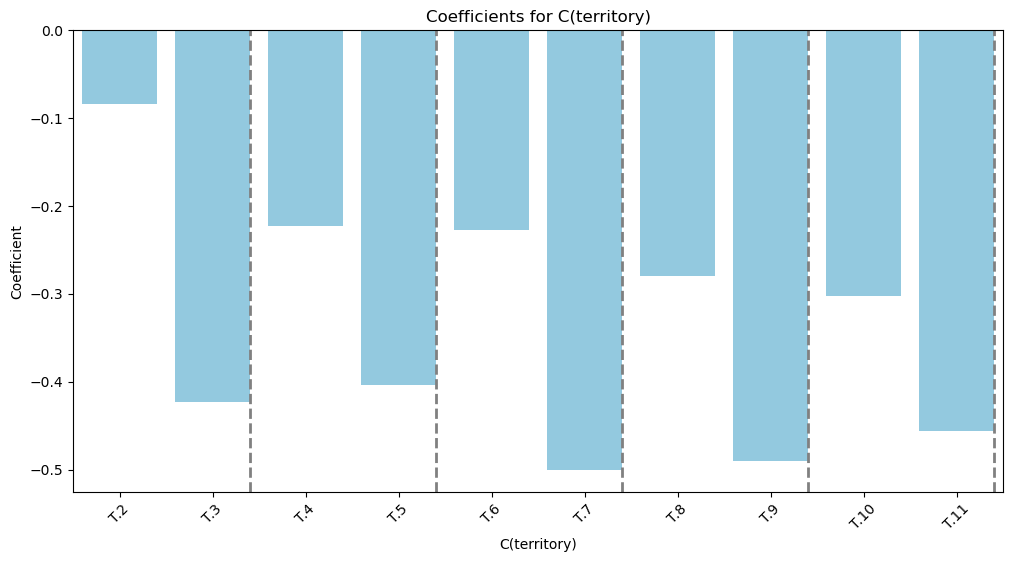

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and territory categories from the summary table
coefficients = results.params.loc['C(territory)[T.2]': 'C(territory)[T.11]']
territories = [f'T.{i}' for i in range(2, 12)]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=territories, y=coefficients, color='skyblue')

# Add a separating line after every odd index
for i, bar in enumerate(ax.patches):
    if i % 2 != 0:
        ax.axvline(x=bar.get_x() + bar.get_width(), color='gray', linestyle='--', linewidth=2.0)

plt.title('Coefficients for C(territory)')
plt.xlabel('C(territory)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#les coefficients sont plus raisonnables : on a corrige la surestimation au depart en selectionnant un vecteur d'amenites